In [39]:
# Imports
import warnings
import numpy as np
import pandas as pd
import pyfixest as pf
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
import statsmodels.api as sm
from typing import List
from stargazer.stargazer import Stargazer
from IPython.display import display, Latex, Markdown
pd.options.mode.chained_assignment = None

In [40]:
dataBWA = pd.read_csv("https://raw.githubusercontent.com/akhandelwal8/globaleconomics/refs/heads/main/hwk/hwk4a_tradedataBWA.csv", sep='\t')
dataZFA = pd.read_csv("https://raw.githubusercontent.com/akhandelwal8/globaleconomics/refs/heads/main/hwk/hwk4b_tradedataZAF.csv",sep='\t')

## Question 1

#### 1.a

In [41]:
BWA00 = dataBWA.loc[dataBWA['year']==2000]
BWA23 = dataBWA.loc[dataBWA['year']==2023]

BWA = pd.merge(BWA00,BWA23,on=['hs2','description','iso'],suffixes=['2000','2023'])
BWA['xgrowth'] = (BWA['x2023']-BWA['x2000'])/BWA['x2000']*100

display(BWA.loc[:,['description','x2000','x2023','xgrowth']])

,description,x2000,x2023,xgrowth
0,Animals; live,235090,45727526,19351.072355
1,Meat and edible meat offal,51610108,23733917,-54.013045
2,"Fish and crustaceans, molluscs and other aquat...",1534,2381250,155131.421121
3,Dairy produce; birds' eggs; natural honey; edi...,77585,182639,135.405040
4,Animal originated products; not elsewhere spec...,2707,15564,474.953823
...,...,...,...,...
91,Arms and ammunition; parts and accessories the...,57194,14220,-75.137252
92,"Furniture; bedding, mattresses, mattress suppo...",1116098,3683805,230.061070
93,"Toys, games and sports requisites; parts and a...",118377,77068,-34.896137
94,Miscellaneous manufactured articles,1682856,107116,-93.634868


#### 1.b

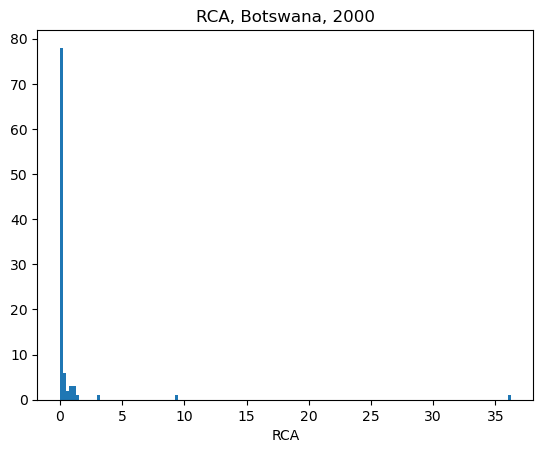

In 2000, Botswana had an RCA greater than 1 in **7** sectors.

In [42]:
totxwd2000 = np.sum(BWA['x_wd2000'])
totxBWA2000 = np.sum(BWA['x2000'])
BWA['RCA2000'] = (BWA['x2000']/totxBWA2000) / (BWA['x_wd2000']/totxwd2000)

plt.figure()
plt.hist(BWA['RCA2000'],bins=np.arange(np.min(BWA['RCA2000']),np.max(BWA['RCA2000'])+0.25,0.25))
plt.title("RCA, Botswana, 2000")
plt.xlabel("RCA")
plt.show()

RCAabove1_2000 = np.sum(BWA['RCA2000'] >= 1.0)

Markdown(f"In 2000, Botswana had an RCA greater than 1 in **{RCAabove1_2000}** sectors.")

#### 1.c

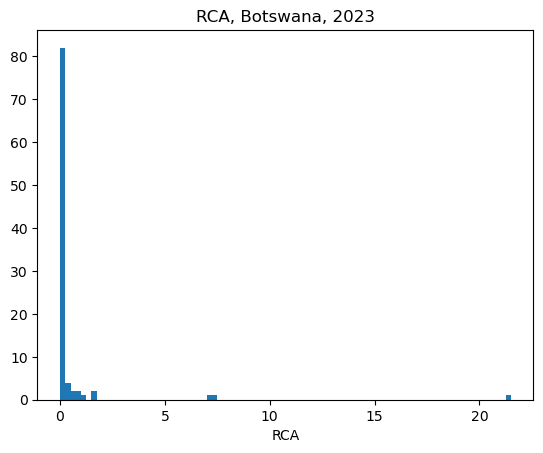

In 2023, Botswana had an RCA greater than 1 in **6** sectors.

In [43]:
totxwd2023 = np.sum(BWA['x_wd2023'])
totxBWA2023 = np.sum(BWA['x2023'])
BWA['RCA2023'] = (BWA['x2023']/totxBWA2023) / (BWA['x_wd2023']/totxwd2023)

plt.figure()
plt.hist(BWA['RCA2023'],bins=np.arange(np.min(BWA['RCA2023']),np.max(BWA['RCA2023'])+0.25,0.25))
plt.title("RCA, Botswana, 2023")
plt.xlabel("RCA")
plt.show()

RCAabove1_2023 = np.sum(BWA['RCA2023'] >= 1.0)

Markdown(f"In 2023, Botswana had an RCA greater than 1 in **{RCAabove1_2023}** sectors.")

#### 1.d

In [44]:
RCA71_2000 = (BWA['RCA2000'].loc[BWA['hs2']==71]).item()
RCA71_2023 = (BWA['RCA2023'].loc[BWA['hs2']==71]).item()

Markdown(f"Between 2000 and 2023, Botswana's comparative advantage in HS71 declined, with the RCA decreasing from {RCA71_2000:.3f} to {RCA71_2023:.3f}.")

Between 2000 and 2023, Botswana's comparative advantage in HS71 declined, with the RCA decreasing from 36.073 to 21.371.

#### 1.e

In [45]:
BWA['RCAdelta'] = BWA['RCA2023']-BWA['RCA2000']
BWAsort = BWA.sort_values(by='RCAdelta')

top3RCAinc = BWAsort.tail(3)
top3RCAinc

,iso,hs2,description,year2000,x2000,x_wd2000,year2023,x2023,x_wd2023,xgrowth,RCA2000,RCA2023,RCAdelta
76,BWA,78,Lead and articles thereof,2000,9434,1736383232,2023,3353826,9660041216,35450.413398,0.013479,1.659831,1.646352
25,BWA,26,"Ores, slag and ash",2000,137671,26425796608,2023,507903422,337366253568,368825.497745,0.012925,7.197501,7.184576
0,BWA,1,Animals; live,2000,235090,9799775232,2023,45727526,29942562816,19351.072355,0.059516,7.301145,7.241630


The top 3 industry sectors in which Botswana's comparative advantage increased, based on absolute increases in the RCA, are (1) Live Animals, HS1, (2) Ores, Slag, and Ash, HS26, and (3) Lead and Articles Thereof, HS78.


#### 1.f

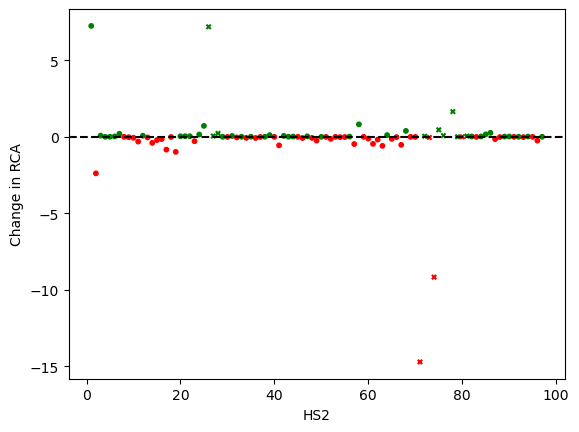

In [61]:
minerals = [26,27,28,71,72,73,74,75,76,77,78,79,80,81]

mineralData = BWA[BWA['hs2'].isin(minerals)]
nonMineralData = BWA[np.invert(BWA['hs2'].isin(minerals))]

colors1 = ['r' if RCAdelta < 0 else 'g' for RCAdelta in mineralData['RCAdelta']]
colors2 = ['r' if RCAdelta < 0 else 'g' for RCAdelta in nonMineralData['RCAdelta']]

plt.figure()
plt.scatter(mineralData['hs2'],mineralData['RCAdelta'],10,marker='x',c=colors1)
plt.scatter(nonMineralData['hs2'],nonMineralData['RCAdelta'],10,marker='o',c=colors2)
plt.axhline(0,color='k',linestyle='--')
plt.xlabel("HS2")
plt.ylabel("Change in RCA")
plt.show()


## Question 2

#### 2.a

In [62]:
dataZFA = pd.read_csv("https://raw.githubusercontent.com/akhandelwal8/globaleconomics/refs/heads/main/hwk/hwk4b_tradedataZAF.csv",sep='\t')

